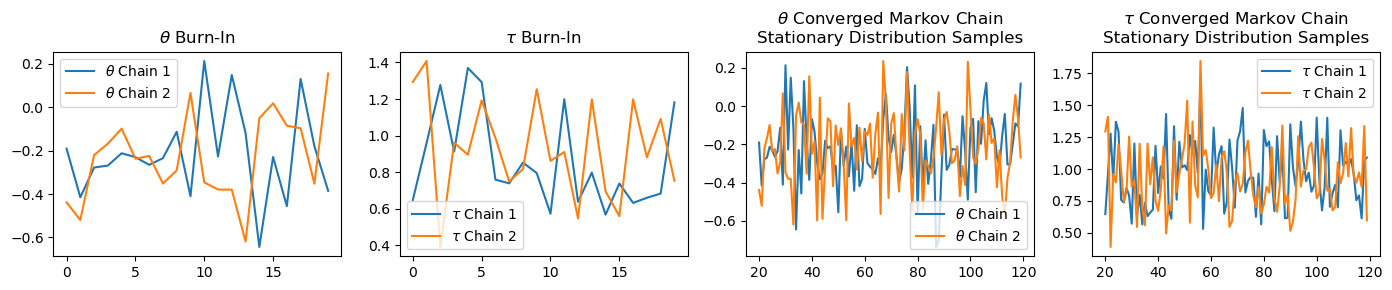

Posterior mean of θ: -0.228
Posterior mean of τ: 0.960
Posterior std of θ: 0.193
Posterior std of τ: 0.252
95% credible interval for θ: [-0.610, 0.151]
95% credible interval for τ: [0.531, 1.515]


In [24]:
#Q1

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gibbs sampler function
def gibbs_sampler(data, num_samples=10000, burn_in=100, chains=2):
    n = len(data)
    sample_mean = np.mean(data)
    
    # Initialize storage for chains
    theta = np.zeros((chains, num_samples))
    tau = np.zeros((chains, num_samples))
    
    # Initialize theta
    theta[:, 0] = 1000  

    for c in range(chains):
        for g in range(1, num_samples):
            # Update tau | theta, x
            shape = n / 2
            rate = np.sum((data - theta[c, g - 1]) ** 2) / 2
            tau[c, g] = stats.gamma.rvs(a=shape, scale=1 / rate)
            
            # Update theta | tau, x
            sigma_theta_sq = 1 / (tau[c, g] * n)
            mu_theta = sample_mean
            theta[c, g] = stats.norm.rvs(loc=mu_theta, scale=np.sqrt(sigma_theta_sq))

    return theta[:, burn_in:], tau[:, burn_in:]

# Generate data
n, m, s = 30, 0, 1  # Number of samples, mean, std deviation
data = stats.norm(loc=m, scale=s).rvs(size=n)

chains, num_samples, burn_in = 2, 10000, 100
theta_samples, tau_samples = gibbs_sampler(data, num_samples, burn_in, chains)

theta_flat = theta_samples.flatten()
tau_flat = tau_samples.flatten()

# 95% credible intervals
theta_ci = np.percentile(theta_flat, [2.5, 97.5])
tau_ci = np.percentile(tau_flat, [2.5, 97.5])

# Visualize results
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(chains):
    ax[0].plot(theta_samples[c, :burn], label=f"$\\theta$ Chain {c + 1}")
    ax[1].plot(tau_samples[c, :burn], label=f"$\\tau$ Chain {c + 1}")
    ax[2].plot(np.arange(burn, demo), theta_samples[c, :demo-burn], label=f"$\\theta$ Chain {c + 1}")
    ax[3].plot(np.arange(burn, demo), tau_samples[c, :demo-burn], label=f"$\\tau$ Chain {c + 1}")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.tight_layout()
plt.show()

print(f"Posterior mean of θ: {np.mean(theta_flat):.3f}")
print(f"Posterior mean of τ: {np.mean(tau_flat):.3f}")
print(f"Posterior std of θ: {np.std(theta_flat):.3f}")
print(f"Posterior std of τ: {np.std(tau_flat):.3f}")
print(f"95% credible interval for θ: [{theta_ci[0]:.3f}, {theta_ci[1]:.3f}]")
print(f"95% credible interval for τ: [{tau_ci[0]:.3f}, {tau_ci[1]:.3f}]")



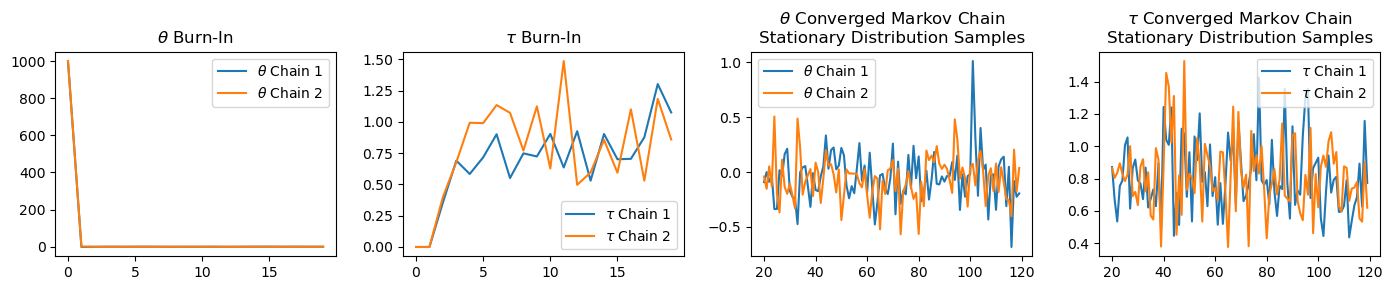

In [21]:
#Q2
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gibbs Sampler
def gibbs_sampler(x, theta_0, tau_0, alpha, lambd, num_samples=10000, burn_in=20, chains=2):
    n = len(x)
    theta = np.zeros((chains, num_samples))
    tau = np.zeros((chains, num_samples))
    theta[:, 0] = 1000  # Initialization for theta

    for c in range(chains):
        for g in range(1, num_samples):
            # Update tau | theta, x
            shape = (n + alpha) / 2
            rate = (lambd + np.sum((x - theta[c, g - 1]) ** 2)) / 2
            tau[c, g] = stats.gamma.rvs(a=shape, scale=1/rate)
            
            # Update theta | tau, x
            tau_n = tau[c, g] * n
            sigma_theta_sq = 1 / (tau_n + tau_0)
            mu_theta = (tau_n * np.mean(x) + tau_0 * theta_0) * sigma_theta_sq
            theta[c, g] = stats.norm.rvs(loc=mu_theta, scale=np.sqrt(sigma_theta_sq))
    
    return theta, tau

# Data and Prior Parameters
n, theta_0, tau_0, alpha, lambd = 30, 0, 1, 2, 1
x = stats.norm(loc=0, scale=1).rvs(size=n)

theta_samples, tau_samples = gibbs_sampler(x, theta_0, tau_0, alpha, lambd)

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(2):
    ax[0].plot(theta_samples[c, :burn], label=f"$\\theta$ Chain {c + 1}")
    ax[1].plot(tau_samples[c, :burn], label=f"$\\tau$ Chain {c + 1}")
    ax[2].plot(np.arange(burn, demo), theta_samples[c, burn:demo], label=f"$\\theta$ Chain {c + 1}")
    ax[3].plot(np.arange(burn, demo), tau_samples[c, burn:demo], label=f"$\\tau$ Chain {c + 1}")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.tight_layout()
plt.show()


#Q3

The Multinomial-Dirichlet model is a generalization of the Beta-Binomial model.

Observed data:

$$
\mathbf{x} = \left(x_1, x_2, \ldots, x_k\right) \sim \operatorname{Multinomial}(n, \boldsymbol{\theta})
$$

where 

$$
n = \sum_{i=1}^k x_i
$$

and 

$$
\boldsymbol{\theta} = \left(\theta_1, \theta_2, \ldots, \theta_k\right) 
$$ 

satisfies 

$$
\sum_{i=1}^k \theta_i = 1.
$$

Prior distribution:

$$
\boldsymbol{\theta} \sim \operatorname{Dirichlet}\left(\alpha_1, \alpha_2, \ldots, \alpha_k\right)
$$

The goal is to derive the posterior distribution 

$$
p(\boldsymbol{\theta} \mid \mathbf{x}).
$$

From Bayes' theorem:

$$
p(\boldsymbol{\theta} \mid \mathbf{x}) \propto p(\mathbf{x} \mid \boldsymbol{\theta}) p(\boldsymbol{\theta})
$$

The Multinomial likelihood is:

$$
p(\mathbf{x} \mid \boldsymbol{\theta}) = \frac{n!}{x_{1}!x_{2}!\cdots x_{k}!} \prod_{i=1}^k \theta_i^{x_i}
$$

The Dirichlet prior is:

$$
p(\boldsymbol{\theta}) = \frac{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}{\prod_{i=1}^k \Gamma\left(\alpha_i\right)} \prod_{i=1}^k \theta_i^{\alpha_i-1}
$$

The joint distribution is:

$$
p(\mathbf{x}, \boldsymbol{\theta}) \propto p(\mathbf{x} \mid \boldsymbol{\theta}) p(\boldsymbol{\theta})
$$

Substituting the equations above:

$$
p(\mathbf{x}, \boldsymbol{\theta}) \propto \prod_{i=1}^k \theta_i^{x_i} \prod_{i=1}^k \theta_i^{\alpha_i-1}
$$

Combine the powers of 

$$
\theta_i:
$$

$$
p(\mathbf{x}, \boldsymbol{\theta}) \propto \prod_{i=1}^k \theta_i^{x_i+\alpha_i-1}
$$

The posterior distribution is proportional to the joint distribution:

$$
p(\boldsymbol{\theta} \mid \mathbf{x}) \propto \prod_{i=1}^k \theta_i^{x_i+\alpha_i-1}
$$

Recognizing the form, this matches the functional form of a Dirichlet distribution:

$$
\operatorname{Dirichlet}\left(\beta_1, \beta_2, \ldots, \beta_k\right) \propto \prod_{i=1}^k \theta_i^{\beta_i-1}
$$

where 

$$
\beta_i = x_i + \alpha_i.
$$

Thus, the posterior distribution is:

$$
\boldsymbol{\theta} \mid \mathbf{x} \sim \operatorname{Dirichlet}\left(\alpha_1+x_1, \alpha_2+x_2, \ldots, \alpha_k+x_k\right)
$$

